In [6]:
import pandas as pd
import numpy as np
import warnings

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

Load dataset và chuyển thành kiểu dữ liệu DataFrame

In [2]:
cancer_data = datasets.load_breast_cancer()
                  
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df = pd.concat([df, pd.DataFrame(cancer_data.target, columns=['label'])], axis='columns')

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Kiểm tra độ cân bằng của dữ liệu

<Axes: ylabel='label'>

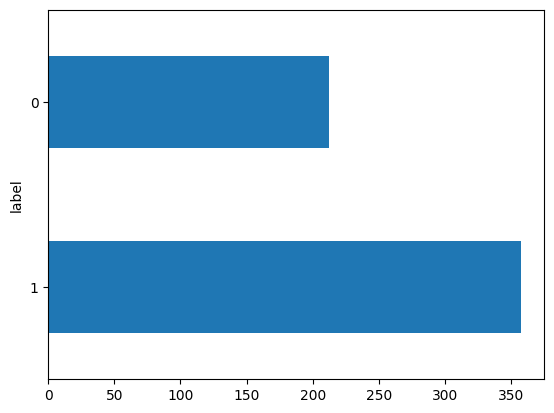

In [3]:
df['label'].value_counts().plot(kind='barh')

Chuyển label từ {0, 1} sang {-1, 1} để phù hợp với Perceptron

In [4]:
y_df = df['label']
target_label = {1: 1, 0: -1}
target_df = [target_label[item] for item in y_df]

print(target_df)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1,

Lấy ra phần dữ liệu và thêm trường dữ liệu x0 = 1 vào bên trái

In [5]:
inputs_df = df.drop('label', axis=1)

x0 = np.ones((inputs_df.shape[0], 1))
X = np.concatenate((x0, inputs_df), axis=1)

Chia tập train : test theo tỷ lệ 7 : 3

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, target_df, test_size=0.3,random_state=18)

Hàm dấu

In [8]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
    return np.sign(np.dot(w.T, x))

Điều kiện dừng

In [9]:
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

Hàm Perceptron

In [10]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = [] # set of miss position points
    iter = 0
    eta = 0.05
    
    while iter < 10000:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(X.shape[0], 1)
            yi = y[mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + eta*yi*xi
                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
        
        iter += 1
    return (w, mis_points)

Hàm dự đoán

In [11]:
def predict(w, x):
    return h(w, x)

Huấn luyện và đánh giá mô hình Perceptron

In [12]:
d = X.T.shape[0]
w_init = np.random.randn(d, 1)


(w, m) = perceptron(X_train.T, y_train, w_init)
y_pred = predict(w[-1], X_test.T)

print('Accuracy:', accuracy_score(y_test, y_pred[0]))
print('Recall:', recall_score(y_test, y_pred[0]))
print('Precision:', precision_score(y_test, y_pred[0]))

Accuracy: 0.7309941520467836
Recall: 0.5445544554455446
Precision: 1.0


Giảm chiều dữ liệu về 2 chiều sử dụng PCA

In [13]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(inputs_df)

Hiển thị kết quả dữ liệu đã giảm chiều

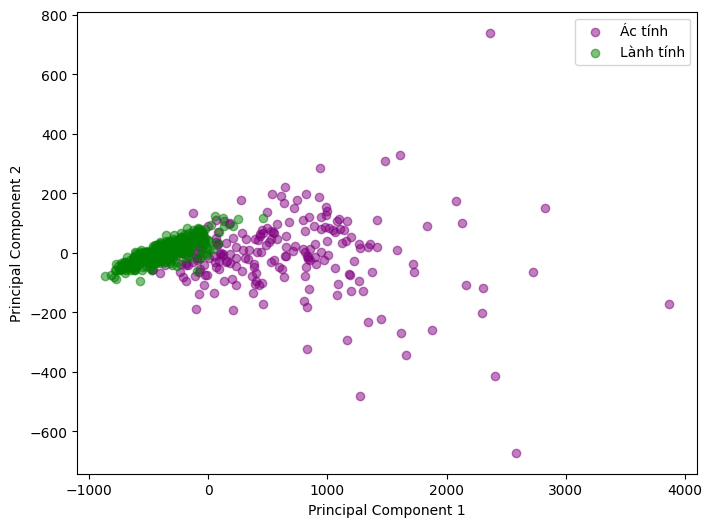

In [14]:
target_df = np.array(target_df)

labels = ['Ác tính', 'Lành tính']
colors = ['purple', 'green']

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[target_df==-1, 0], X_pca[target_df==-1, 1], alpha=0.5, label=labels[0], c=colors[0])
plt.scatter(X_pca[target_df==1, 0], X_pca[target_df==1, 1], alpha=0.5, label=labels[1], c=colors[1])

    
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

Huấn luyện và đánh giá mô hình Logistic Regression

In [15]:
logR = LogisticRegression()

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(inputs_df, target_df, test_size=0.3,random_state=18)

logR.fit(X_train_n, y_train_n)
y_pred_logR = logR.predict(X_test_n)

print('Accuracy:', accuracy_score(y_test_n, y_pred_logR))
print('Recall:', recall_score(y_test_n, y_pred_logR))
print('Precision:', precision_score(y_test_n, y_pred_logR))

Accuracy: 0.9415204678362573
Recall: 0.9603960396039604
Precision: 0.941747572815534


**So sánh kết quả giữa 2 phương pháp Perceptron và Logistic Regression**

* `Accuracy`: Độ chính xác của Logistic Regression cao hơn hẳn so với Perceptron
* `Recall`: Của Logistic Regression ở mức cao còn Perceptron chỉ ở mức trung bình
* `Precision`: Của cả 2 mô hình đều ở mức cao